Importing Pandas,Numpy,Seaborn,Matplotlib & Warnings Library

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [17]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataset

In [19]:
df.shape

(1000, 8)

Check Missing Values

In [20]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

Check Duplicates

In [21]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

Check data types

In [22]:
# Check Null & dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check Number of Unique Values of Each Columns

In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check Statistics of data set

In [24]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring DataSet

In [25]:
print('Categories in "gender" variable:',end=' ')
print(df['gender'].unique())

print('Categories in "race_ethnicity" variable:',end=' ')
print(df['race_ethnicity'].unique())

print('Categories in "parental_level_of_education	" variable:',end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in "lunch" variable:',end=' ')
print(df['lunch'].unique())

print('Categories in "test_preparation_course" variable:',end=' ')
print(df['test_preparation_course'].unique())

Categories in "gender" variable: ['female' 'male']
Categories in "race_ethnicity" variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental_level_of_education	" variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable: ['standard' 'free/reduced']
Categories in "test_preparation_course" variable: ['none' 'completed']


Define Numerical and Categorical Columns

In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding Columns for "Total Score" & "Average"

In [28]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [30]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Exploring Data (Visualization)

Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

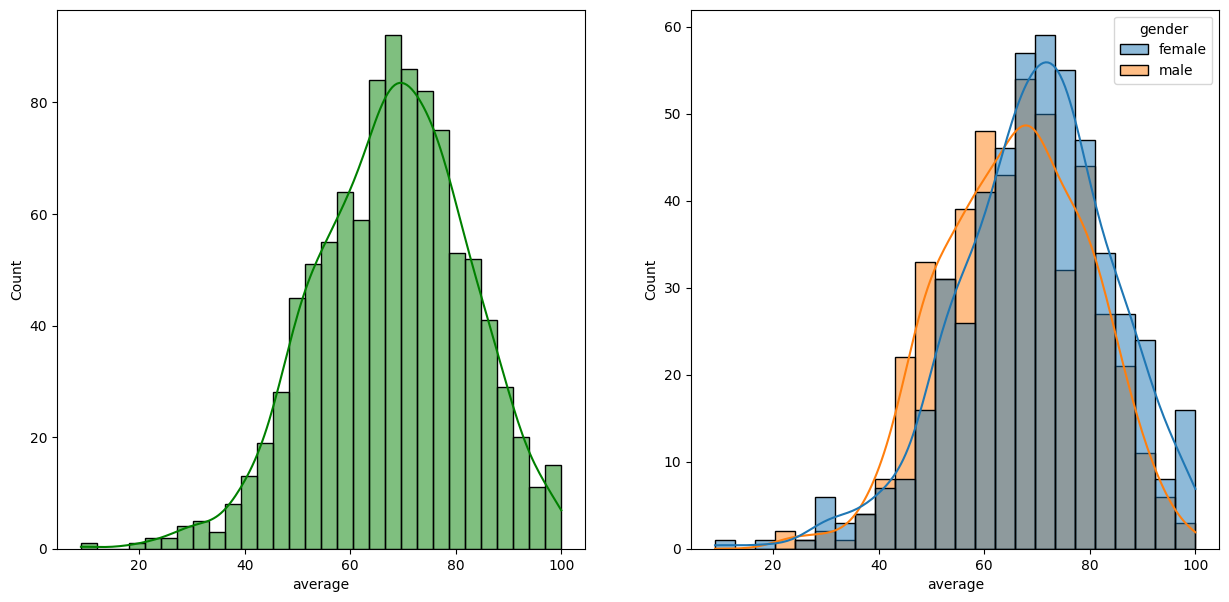

In [31]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x = 'average',kde = True,hue = 'gender')

Model Training

In [32]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Preparing X and Y Variables

In [34]:
X = df.drop(columns = ['math_score'],axis = 1)

In [35]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [36]:
y = df['math_score']

In [37]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

Create Column Transformer with 3 types of transformers

In [39]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaled',numeric_transformer,num_features)
    ]
)

In [40]:
X = preprocessor.fit_transform(X)

Separate Dataset into Train & Test

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape

((800, 21), (200, 21))

Create an Evaluate Function to give all metrics after Model Training

In [50]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 =  r2_score(true,predicted)
    return mae,rmse,r2

In [54]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'CatBoosting Regressor' : CatBoostRegressor(),
    'AdaBoost Regressor' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model_name = list(models.keys())[i]  # Get model name
    model = list(models.values())[i]     # Get model object
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train & Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(model_name)           # CORRECT - uses model_name
    model_list.append(model_name)  # CORRECT - uses model_name
    
    print('Model Performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Square: {:.4f}'.format(model_train_r2))
    
    print('---------------------------------')
    
    print('Model Performance for Test Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Square: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Square: 1.0000
---------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Square: 1.0000


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Square: 0.9004
---------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Square: 0.9086


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Square: 0.9995
---------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Square: 0.9995


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 4.2791
- Mean Absolute Error: 3.3838
- R2 Square: 0.9188
-------------------

Results

In [56]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending = False)

,Model Name,R2 Score
0,Linear Regression,1.000000
2,Ridge,0.999516
6,XGBRegressor,0.977101
7,CatBoosting Regressor,0.968100
5,Random Forest Regressor,0.963164
4,Decision Tree,0.940392
8,AdaBoost Regressor,0.924292
1,Lasso,0.908560
3,K-Neighbors Regressor,0.889781


Linear Regression

In [57]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 100.00


Plot y_pred & y_test

Text(0, 0.5, 'Predicted')

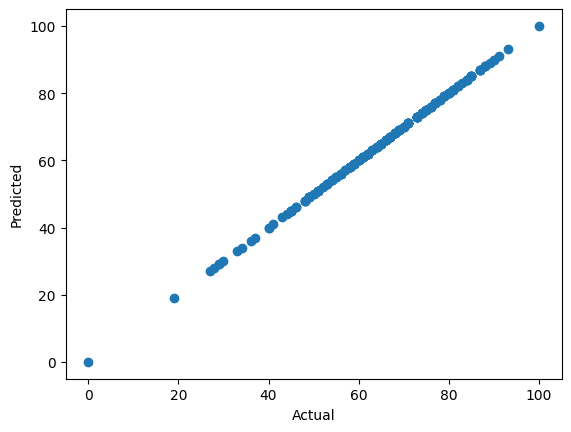

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

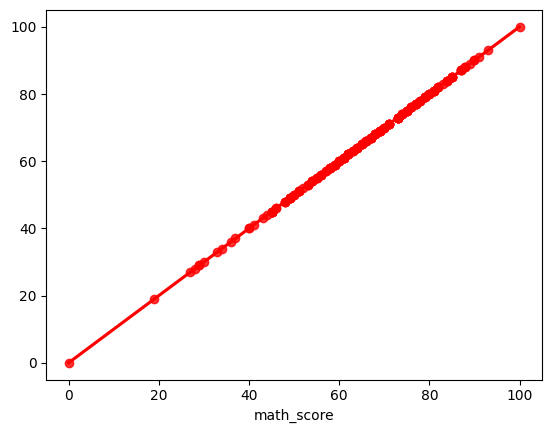

In [59]:
sns.regplot(x = y_test,y = y_pred,ci = None,color = 'red')

Difference Between Actual & Predicted Values

In [60]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.131628e-13
737,53,53.0,5.684342e-14
740,80,80.0,-7.105427e-14
660,74,74.0,-5.684342e-14
411,84,84.0,-1.421085e-13
...,...,...,...
408,52,52.0,1.705303e-13
332,62,62.0,1.350031e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-7.105427e-14
